<a href="https://colab.research.google.com/github/Arvind-55555/Optimizing-Hydrogen-Reactor-Design-SMR/blob/main/Optimizing_Hydrogen_Reactor_Design_SMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title**

**Reactor Design:** Using ML for optimizing reactor configurations and operations in steam methane reforming (SMR) or thermochemical processes.

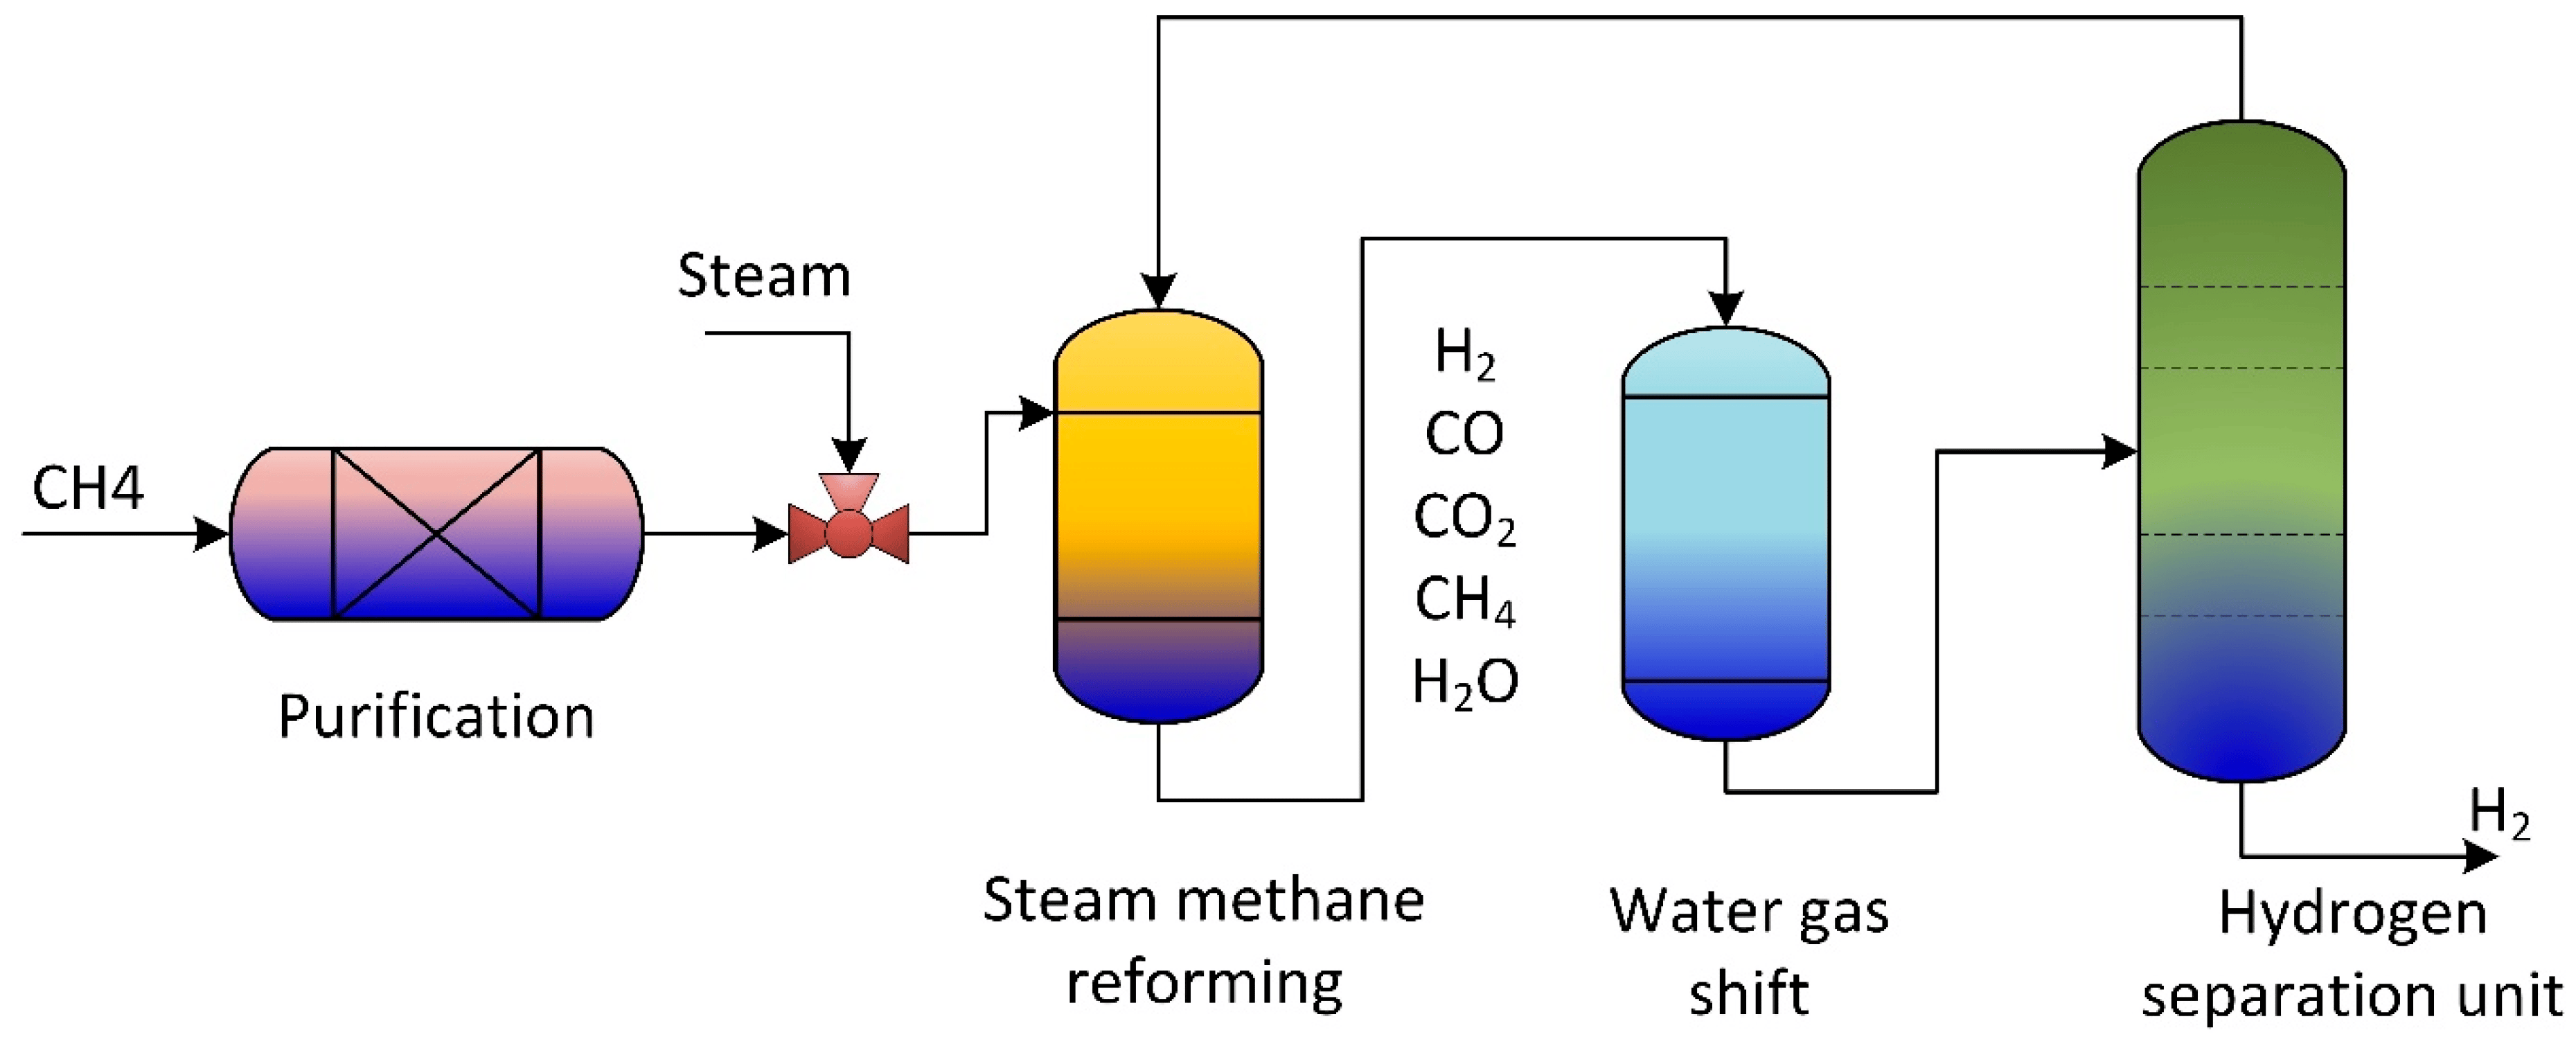

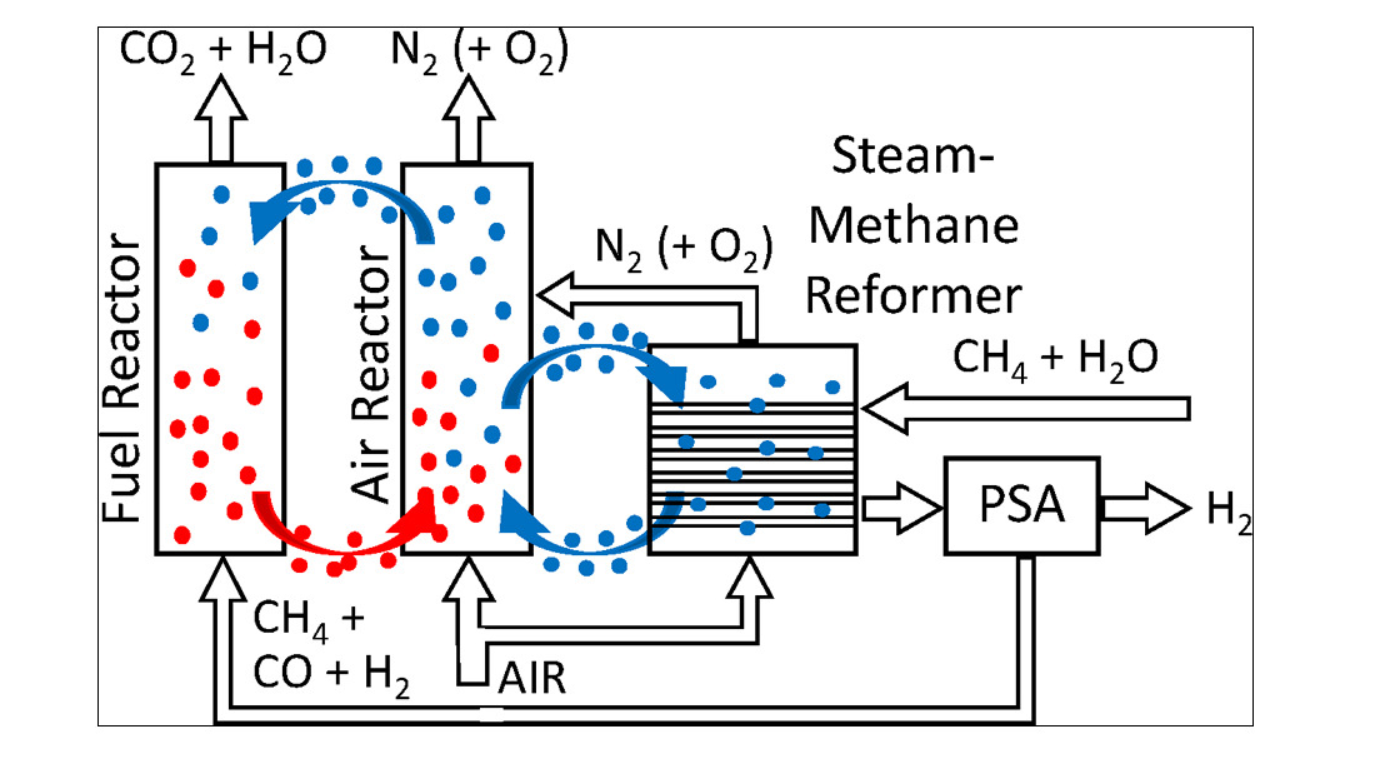

**1. Problem Definition**

**Objective:** Optimize reactor configurations and operational parameters to maximize hydrogen yield, energy efficiency, or reduce greenhouse gas emissions.

**Inputs:** Design variables
  * reactor geometry,
  * catalyst type,
  * temperature,
  * pressure,
  * feedstock composition.

**Outputs:**
  * Hydrogen yield,
  * CO₂ emissions, or
  * energy efficiency.

**2. Data Collection**

**Features to Include:**

* **Reactor design parameters**
  * length,
  * diameter,
  * catalyst type,
  * packing density.
* **Operating conditions**
  * temperature,
  * pressure,
  * methane-to-steam ratio.
* **Reaction kinetics**
  * reaction rate constants,
  * activation energy.
* **Performance metrics**
  * hydrogen yield,
  * CO₂
  * emissions,
  * energy consumption.

**Dataset Size:** Aim for at least 10,000 samples (real + synthetic) for effective training.

In [ ]:
#Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Generating Synthetic Data for Reactor Simulations**

In [ ]:
import numpy as np

# Define parameter ranges (example values)
temperature_range = np.linspace(500, 1000, 50)  # in Kelvin
pressure_range = np.linspace(1, 50, 50)  # in bar
methane_ratio_range = np.linspace(1, 5, 50)  # molar ratio
reactor_length_range = np.linspace(1, 10, 50)  # in meters
reactor_diameter_range = np.linspace(0.1, 1.0, 50)  # in meters

# Generate synthetic combinations
n_samples = 10000
temperatures = np.random.choice(temperature_range, n_samples)
pressures = np.random.choice(pressure_range, n_samples)
methane_ratios = np.random.choice(methane_ratio_range, n_samples)
reactor_lengths = np.random.choice(reactor_length_range, n_samples)
reactor_diameters = np.random.choice(reactor_diameter_range, n_samples)

# Example output variables (use formulas or simulation models)
hydrogen_yield = (0.75 * temperatures / pressures) * (methane_ratios / reactor_lengths)  # Placeholder formula
co2_emissions = (0.2 * pressures / temperatures) * reactor_diameters  # Placeholder formula

In [ ]:
# Create dataset
data = np.column_stack((temperatures, pressures, methane_ratios, reactor_lengths, reactor_diameters, hydrogen_yield, co2_emissions))
columns = ["Temperature", "Pressure", "Methane_Ratio", "Reactor_Length", "Reactor_Diameter", "Hydrogen_Yield", "CO2_Emissions"]

# Save as CSV
import pandas as pd
df = pd.DataFrame(data, columns=columns)
df.to_csv("synthetic_reactor_data.csv", index=False)
print("Synthetic data generated and saved!")

Synthetic data generated and saved!


In [ ]:
df.head(10)

,Temperature,Pressure,Methane_Ratio,Reactor_Length,Reactor_Diameter,Hydrogen_Yield,CO2_Emissions
0,989.795918,27.0,4.102041,3.755102,0.981633,30.034568,0.005355
1,979.591837,35.0,2.142857,9.816327,0.540816,4.582290,0.003865
2,714.285714,14.0,2.224490,2.836735,0.173469,30.006607,0.000680
3,755.102041,34.0,2.061224,8.897959,0.485714,3.858539,0.004374
4,520.408163,12.0,3.204082,10.000000,0.375510,10.421439,0.001732
5,969.387755,10.0,1.816327,6.693878,0.540816,19.727632,0.001116
6,500.000000,27.0,4.755102,4.673469,0.448980,14.131490,0.004849
7,846.938776,47.0,3.040816,2.102041,0.908163,19.550797,0.010080
8,642.857143,32.0,3.938776,9.632653,0.118367,6.160856,0.001178
9,561.224490,38.0,4.510204,7.979592,0.540816,6.260800,0.007324


In [ ]:
# Select float columns and convert to int
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype(int)

In [ ]:
# Load and preprocess data
X = df[["CO2_Emissions", "Temperature", "Pressure", "Methane_Ratio", "Reactor_Length", "Reactor_Diameter"]]
y = df[["Hydrogen_Yield", "CO2_Emissions"]]

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1])  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
#  Train the model
history = model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=32)

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 4982.5244 - mae: 17.5179 - val_loss: 2815.6731 - val_mae: 12.2850
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4274.9873 - mae: 13.9493 - val_loss: 2441.4175 - val_mae: 9.9935
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4040.3906 - mae: 11.2034 - val_loss: 2141.2996 - val_mae: 9.4843
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3064.7544 - mae: 10.1348 - val_loss: 1922.8829 - val_mae: 7.8311
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2917.8237 - mae: 8.4060 - val_loss: 1773.0012 - val_mae: 7.0707
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2842.1309 - mae: 8.3198 - val_loss: 1605.3794 - val_mae: 7.3581
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2258.4448 - mae: 7.6418 - val_loss: 1591.8815 - val_mae: 6.0840
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1564.2753 - mae: 6.7111 - val_loss: 1427.5498 - val_mae: 

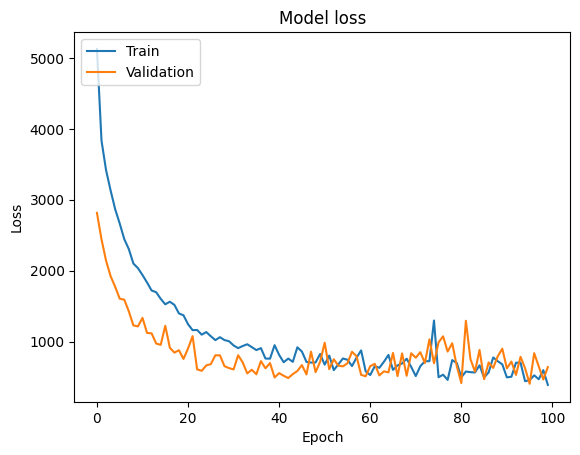

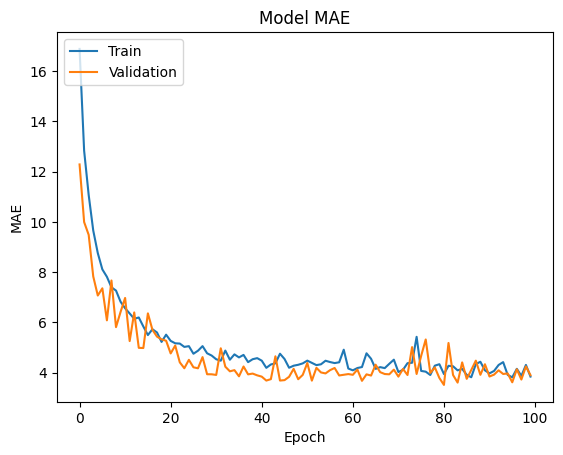

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1596.5555 - mae: 5.3327
Test MAE: 4.80


# Optimizing the Model Architecture

In [ ]:
!pip install keras-tuner -q

In [17]:
import tensorflow as tf
import keras_tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch

# Define model function for tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_input', min_value=32, max_value=256, step=32), activation='relu', input_dim=5))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    model.add(Dense(2))  # Output layer for hydrogen yield and CO2 emissions
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [18]:
# Run the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_logs',
    project_name='reactor_model_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Load data and fit tuner
df = pd.read_csv("synthetic_reactor_data.csv")
X = df.iloc[:, :-2].values
y = df.iloc[:, -2:].values
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)
print("Best hyperparameters:", tuner.get_best_hyperparameters()[0].values)

Trial 10 Complete [00h 03m 05s]
val_mae: 4.690486431121826

Best val_mae So Far: 4.6635003089904785
Total elapsed time: 00h 30m 33s
Best hyperparameters: {'units_input': 224, 'num_layers': 1, 'units_0': 192, 'dropout_0': 0.2, 'units_1': 256, 'dropout_1': 0.1, 'units_2': 192, 'dropout_2': 0.1, 'units_3': 96, 'dropout_3': 0.4, 'units_4': 96, 'dropout_4': 0.2}
